In [1]:
#Necessary libraries 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
torch.__version__

'2.3.1+cu118'

In [3]:
#Model parameters
weights = 0.7
bias = 0.3
#Data Creation
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = X * weights + bias

In [4]:
X[: 10], y[: 10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

**Splitting the dataset into train and test sets**

In [5]:
train_split = int(0.8 * len(X))
X_train, y_train = X[: train_split], y[: train_split]
X_test, y_test  = X[train_split: ], y[train_split: ]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
#Plotting the predictions
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions = None):
    plt.figure(figsize = (10, 7))
    plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Train set')
    plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'Test set')
    if predictions is not None:
        plt.scatter(test_data, predictions, c = 'r', s = 4, label = 'Predictions')
    plt.legend()

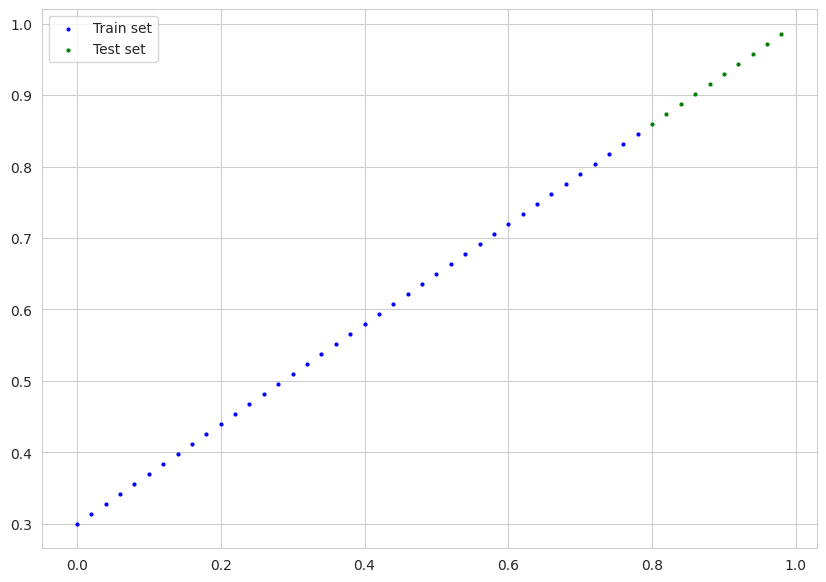

In [7]:
plot_predictions(X_train, y_train, X_test, y_test)

**Model Building**

In [8]:
#Linear Regression
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype = torch.float32))
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float32))
    #Forward Pass function
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return x * self.weights + self.bias

**Checking the model contents**

In [9]:
#Setting seed for reproducibility
torch.manual_seed(42)
model_0 = LinearRegression()
model_0

LinearRegression()

In [10]:
#Checking model parameters
model_0.parameters()

<generator object Module.parameters at 0x77f1c79f4740>

In [11]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
#Model parameter names and their values
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

**Checking model predictions using torch.inference_mode(). This makes the model go through the forward pass**

In [13]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [14]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

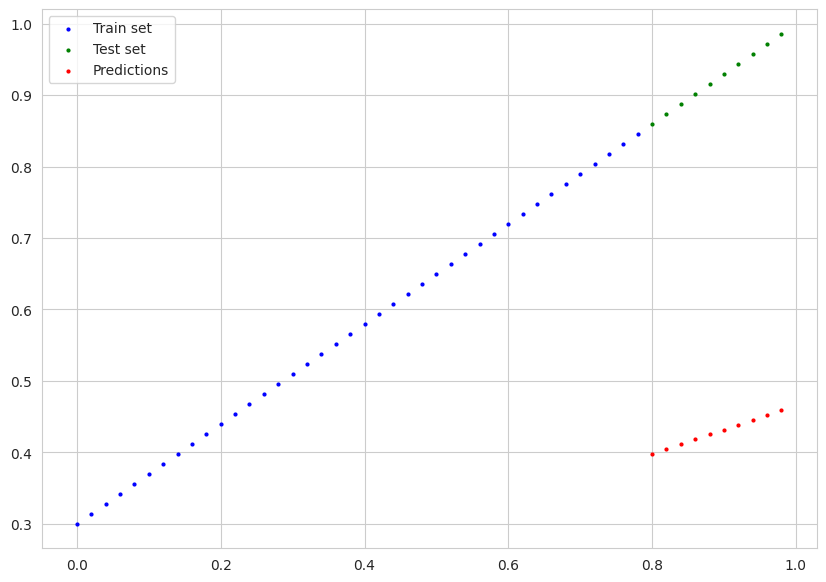

In [15]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

**Setting up Optimizer and Loss function for model training**

**Note: Loss function computes how wrong the model predictions are. Optimizers are the functions that adjust the model parameters to reduce that loss**

**L1 Loss: Mean Absolute Error**

In [16]:
#Setting up Loss function
loss_fn = nn.L1Loss()
#Setting up optimizer (Stochastic Gradient Descent)
#Optimizer has to take in model parameters as argument
#Learning rate is also required (One of the most important hyperparameters)
opt_fn = torch.optim.Adam(params = model_0.parameters(), lr = 0.01)

**Building a training and a testing loop in PyTorch**

0. Loop through the data
1. Forward pass (Involves the data moving through the function forward ())
2. Compute the loss (Comparison of forward pass predictions and the true values)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to compute gradients of each parameter of the model with respect to the loss
5. Optimizer step - Using optimizer to adjust model parameters via gradient descent

In [17]:
#Setting up looping parameters
Epochs = []
training_loss = []
Test_Loss = []
torch.manual_seed(42)
epochs = 100
for epoch in range (epochs):
    #Setting the model to training mode
    model_0.train() # Train mode in PyTorch Set; Sets all the model parameters to requires_grad = True
    #Forward Pass after setting the model to training mode
    y_pred = model_0(X_train)
    #Loss
    loss = loss_fn(y_pred, y_train)
    print(f'Loss: {loss}')
    #Optimizer
    opt_fn.zero_grad() # This ensures that the optimizer goes to 0 after the completion of every epoch
    #Backpropagation
    loss.backward() # Backpropagation
    #Step the optimizer
    opt_fn.step() #Performs gradient descent
    #Testing
    model_0.eval() # Turns off gradient tracking
    with torch.inference_mode():
        #Forward Pass
        test_pred = model_0(X_test)
        #Compute Test Loss
        test_loss = loss_fn(test_pred, y_test)
    if(epoch % 10 == 0): # Checking the metrics for every 10 epochs
        Epochs.append(epoch)
        training_loss.append(loss)
        Test_Loss.append(test_loss)
        print(f'Epoch: {epoch}, Loss: {loss}, Test Loss: {test_loss}')
        print(model_0.state_dict())

Loss: 0.31288138031959534
Epoch: 0, Loss: 0.31288138031959534, Test Loss: 0.47563618421554565
OrderedDict([('weights', tensor([0.3467])), ('bias', tensor([0.1388]))])
Loss: 0.29898133873939514
Loss: 0.28508132696151733
Loss: 0.2711813449859619
Loss: 0.2572813332080841
Loss: 0.2433813512325287
Loss: 0.22948133945465088
Loss: 0.21558134257793427
Loss: 0.20168134570121765
Loss: 0.18778134882450104
Loss: 0.17388132214546204
Epoch: 10, Loss: 0.17388132214546204, Test Loss: 0.2866361737251282
OrderedDict([('weights', tensor([0.4467])), ('bias', tensor([0.2388]))])
Loss: 0.15998134016990662
Loss: 0.1460813283920288
Loss: 0.1321813315153122
Loss: 0.11828134208917618
Loss: 0.10438136011362076
Loss: 0.09048136323690414
Loss: 0.07658137381076813
Loss: 0.06345288455486298
Loss: 0.051896534860134125
Loss: 0.042198795825242996
Epoch: 20, Loss: 0.042198795825242996, Test Loss: 0.0987466350197792
OrderedDict([('weights', tensor([0.5466])), ('bias', tensor([0.3378]))])
Loss: 0.03463803231716156
Loss: 0

**Note: There are 2 modes for PyTorch models, train and eval mode**

**Running the training loop epoch by epoch**

In [18]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.7037], requires_grad=True),
 Parameter containing:
 tensor([0.3006], requires_grad=True)]

In [19]:
weights

0.7

In [20]:
bias

0.3

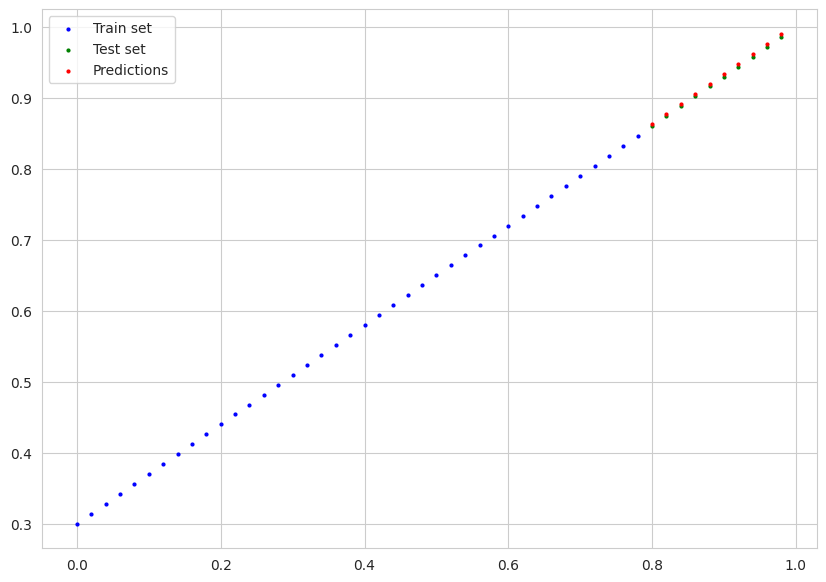

In [21]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_preds_new)

In [22]:
Epochs, training_loss, Test_Loss

([0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1739, grad_fn=<MeanBackward0>),
  tensor(0.0422, grad_fn=<MeanBackward0>),
  tensor(0.0442, grad_fn=<MeanBackward0>),
  tensor(0.0226, grad_fn=<MeanBackward0>),
  tensor(0.0171, grad_fn=<MeanBackward0>),
  tensor(0.0087, grad_fn=<MeanBackward0>),
  tensor(0.0023, grad_fn=<MeanBackward0>),
  tensor(0.0022, grad_fn=<MeanBackward0>),
  tensor(0.0018, grad_fn=<MeanBackward0>)],
 [tensor(0.4756),
  tensor(0.2866),
  tensor(0.0987),
  tensor(0.0055),
  tensor(0.0635),
  tensor(0.0410),
  tensor(0.0133),
  tensor(0.0023),
  tensor(0.0020),
  tensor(0.0038)])

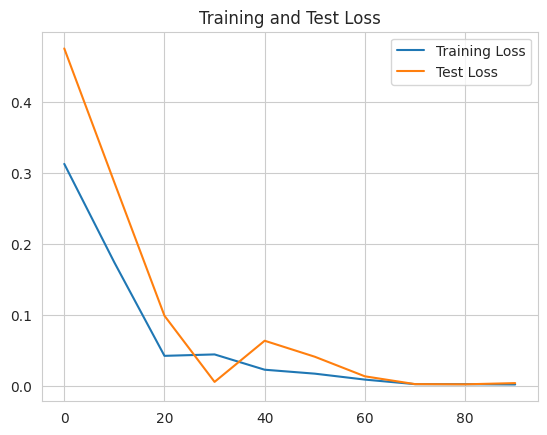

In [23]:
#Plotting loss Curves
plt.plot(Epochs, np.array(torch.tensor(training_loss).numpy()), label = 'Training Loss')
plt.plot(Epochs, np.array(torch.tensor(Test_Loss).numpy()), label = 'Test Loss')
plt.title('Training and Test Loss')
plt.legend()

**Saving a PyTorch model**

3 methods of saving a PyTorch model:
1. **torch.save()**: Saves the model as a .pickle file
2. **torch.load()**: Can be used to load a saved PyTorch model
3. **torch.nn.Module.load_state_dict()**: used for loading model's saved state dictionary 

In [24]:
#Saving PyTorch model
#Importing Path from pathlib class for saving and model handling
from pathlib import Path
#Creating model directory
MODEL_PATH = Path('Models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)
#Model Save Path
MODEL_NAME = 'Vanilla_Linear_Regression.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
#Saving the model state
print(f'Saving model to {MODEL_SAVE_PATH}')
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

Saving model to Models/Vanilla_Linear_Regression.pth


In [25]:
!ls -l Models

total 4
-rw-rw-r-- 1 sanven0212 sanven0212 1668 Aug  9 20:33 Vanilla_Linear_Regression.pth


**Loading the saved model.**

Since, we saved the model's state_dict() and not the entire model, a new model class instance has to be created

In [28]:
loaded_model_0 = LinearRegression()
#A class instance has to be created and the class instance.load_state_dict(torch.save(path)) loads the saved model's state_dict into the new instance
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [29]:
loaded_model_0.eval()
with torch.inference_mode():
    y_pred_loaded = loaded_model_0(X_test)

In [30]:
y_pred_loaded == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

**Setting up device agnostic code**

In [33]:
#Another way of implementing linear regression model
class LinearRegressionV2(nn.Module):
    def __init__(self):
        super().__init__()
        #Using nn Linear layer instead of model parameters
        #Takes in an input of size 1 and an output of size 1
        self.linear_layer = nn.Linear(in_features = 1, out_features = 1)
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x) #linear layer does the operation x * A.T + b which is the linear regression formula itself

In [34]:
torch.manual_seed(42)
model_0v2 = LinearRegressionV2()
model_0v2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [35]:
#The model can be sent to the GPU memory Using:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_0v2.to(device)

LinearRegressionV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)